# COVID-19 social distancing model

This continuous space model assumes people as circles bumping each other to simulate infection process.

Source: [Agents.jl model zoo](https://juliadynamics.github.io/AgentsExampleZoo.jl/dev/examples/social_distancing/)

In [1]:
using Agents
using Random
using Base64
using CairoMakie
CairoMakie.activate!(px_per_unit = 1.0)

function display_mp4(filename)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
        Base64.base64encode(open(read, filename)), """" type="video/mp4"></video>"""))
end

display_mp4 (generic function with 1 method)

Let us first create a simple model where balls move around in a continuous space. We need to create agents that comply with `ContinuousSpace`, i.e. they have a pos and vel fields, both of which are tuples of float numbers.

In [2]:
@agent struct SocialAgent(ContinuousAgent{2, Float64})
    mass::Float64
end

Ball collision model

In [3]:
function ball_model(; speed=0.002, seed=42, model_step! = (m)->nothing)
    space2d = ContinuousSpace((1, 1); spacing = 0.02)
    rng = MersenneTwister(seed)
    model = StandardABM(SocialAgent, space2d; agent_step!, model_step!, properties = Dict(:dt => 1.0), rng)

    for i in 1:500
        pos = Tuple(rand(rng, 2))
        vel = sincos(2π * rand(rng)) .* speed
        mass = 1.0
        add_agent!(pos, model, vel, mass)
    end
    return model
end

ball_model (generic function with 1 method)

Move the agent in a continuous space

In [4]:
agent_step!(agent, model) = move_agent!(agent, model, model.dt)

agent_step! (generic function with 1 method)

## Visualization (I)

In [5]:
Agents.abmvideo(
    "socialdist1.mp4", ball_model();
    title="Ball Model", agent_size=10,
    frames=50, dt=2, framerate=25,
)

display_mp4("socialdist1.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAG1UxtZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTMgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTUwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjAuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAdBlliIQAO//+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwACHnT+DL0/MJqMu2uaMGNLdNgCud51Sc1IaD+EyHi8moPtDWuo3ygG7cJwFMITsmxU3PUMTz2bOKCitaIIoqpmWtXr0gIr7c0tbUNEWfd8gFy7UrsetmgS7oH8i2Kc4tQmeXY4J8ed5YE4rrQ573bSvL5EXPOKS/LmIozLMQFSEKZoLwVAZg02RASH1wLi8zy98LuwTugLE7T2MvcBiZ4jhIm/5LA71OFBMslzgR03F/XqRClzyz4JykA383tID+BLZ7botPDAvAF7GajXNk26x0vVoBtl3cZww3u0P5pOcF0XXyykaLivDvB5PvXNBrlWpcUQNVZTnWZ11/3N9LdZf/Xadc19R3G6Pk6uFAcE0t6jIrDv51wYRuULQm0auSr+MDBprOCV6CO0mRsu/Zf+1xQ71Ft14200Zfa1Coo4BdU/HsRKXkmn36Qiv8mUoOjvHEgdalo6ae8V77d1hEQVolj9/VHpzdZdNMzTNuIzp7KbAVapb/KRxVl4Q3iLm77pzOv+UlJBFhNe/VugHCXmgbM3oaMBbICej3ZSilCcHoQvfbqCa0uhuaVMmvwUjU7i+oIk9mreCTiceox0tOMWnSZGZgGl6EiWeDiO/+jKWmolwx/iNx9lHjWj4Gh2id4tRSls/J6Kgil9T1+0A0EjzWmurccozkdYj33aheUKngCUPlq822jFXc3ipKc59ZWdidJ6ZOomDgMqPoMgF/9juMA0xhbUfkrjdJ9zjvDZymhtF9z5XG5HipuOcoNBFh2uCAH5uUwiAodu0KqIHxvGwtX5Elr0Fa/Atj0bTHElXDEf+272Xzq0gya2k4l+h+7NfhSYyuU+G3yTag0HTLiaojx7pit5QQ85OVEMBcncOBfgBqS87bqbDbtDHZira9/RpKjA/LeGhLFyBOnh+4h6tKbp7AnLhNWCN8C45PXPV8jMBRVT6H0NN2mcDBmcn1Pb0mxNPkvkM72NutQJiten0smVD/jgGBgGEworqDpQXXgt/gfwrr5Z+X7Dr8XEiSc1s5xvEiHoQsECh807ofhn4QaHvVlR5kphLBBTF9YqVu/kiQ6QtW2OTkTF939NcWn2l+flhJIQFS3/Be4n9ltn/55y+6wbeeTZc/jifDxJrkzeHiCyCQhCphaSc3Lf25hjNL9oYOo8Cr98sSvaGUWf/3fkYx9eZUR6BW5jkRs4KtKf/6+VU2cY89WQhTl47iITHtkdL4KCjh9NgvZA1CFbbKH9b/GFTgSCITiArIqPEWkYeLO608SNjB0Tz8LSAUsQqo2wUgZZwQYonwmja/YF7j6brcxFveD3Z9dO3v7zpke+lXv1Hr7P7B/d3SDsYi9twbzD9OBvtT+r4gwFoAAAS3lmBtuUQ4bWMjUZeeUN37MoljGv8OPYkO+uL5JY967MInerP3vjpaxPqT6CAc1LH5cVhQOfcRlAXahYvjp9/2W/67nC27JwXLODPHYDZF7f+06uQ22/Is2iqEeHQxGWfBBz5BpVcp3a6kWaUj5dtYFxvwCKAn9NMH0LqA9scyvyZ//gLoTjIfUsSEsckH/OgHHxTiv55bzDcGHavDNiE8ohfAAKm7pQUI3t/aG3Xek1p7uLprHslsZTe9l09WAXFI3+6kEPPwCvzzCm0+EVu2/eiwTrxFqOFYy4ARTzvG85YCoF3ouUANCdxRlYrGqS0goSpBqhKvp5dqJ1q7j/6/PlV183+hVKkYkswFurJ/8v/WK1YY+F2XCcHcfDOy+BpdmTcFE5sNdSV5t6toe6+PdmUQZ41X72b0K04MO+kx1BTyh0sRscjGsh1/IYr1YDimIy4zd4zqftEkPfhC7Xha+MQYezbeuXfIiJ/GcLwezbUkq6IH/ZdJC6qbHt0iPyfZv4fsGkQvvubqWnbPZji2P6WjpaOZiIHb9zvt6yaakQAk1G8pF15+RfEJY7vqdWkt11tFZEUErjcQq5JMj7mAklo2upFKx6ukuZj9sVVWsnTZ/e8u5+x06t5MvzJYnU6+KxMuFfP0T1GiINxb1zVAeUTOrU2iexAKl0Cyk4daK94RQwVeDiJdRjKVRJCXlZOVJyC5wF4sMkVwMq3bLQ+QoJlxtbJ1MvpNwE1PfRw/6szvnYJ5b3W9J57/JPvgbkUBT4h+w9fPmvm/HwzPp41/zQH8NWNZYAVlyCgdKzt1J9mYyLMFFOPQUSgJsqvMaH3xACS//lS8o70okIoY9QZ9KnDiUPAXsSwFuCetsag909k+b/YmJ8qVnZOfVgps4WyB8qTV6Z0508yximoDVFXlsdy4lrfhzptg/ZrQBSqHPVy+POP7s4owCS9cZVlKwKy3ELmEd4v4wc4La0Yp3/Q9uN4R6DfizFn31VsqSzxfJt3JHDTiiKLPiSHSE21d+bUamLDgghxv/cTLwqgrgG7TUNgsD4uV40IOXdJ8zoEXOwVtVYJnh2rNdYIEjqj8CXLB+TDw+ED0eg52sqJ33rkrL7UXSyga0pJ4SrIwONTrCK9Qvp/dIT2VjfYNREUPy0W347TuPR/vN98IWE6posJP2LnHdsduhvEKxJfXn0hUSZPSDpXyAQ7qPG1dJasK68CxkJZy0+dfFKJo0aTIrkJqYFb2dq9UaKGX1eFV3yQ3ALboZgRjqJ/6esuZRDrKOLDO3S6hUG0p1j17648hvOKghWMSt0NEXqycFutJ0iBhYfxFPHuN4z751Rm3RSxXA+XgydLr2pjMlS6lCAPTYEZihRcDxBdBn0frXCzuNHJy6IuozsjB/ZohpjQNMJ8AAIx8ISWtbC+Xyaj6gDxN7oh3/LzWdQCjCIZi+jvVtNQRAcIMpvvFz9Nyva4t5i7hdyUHkYTZCmEZUiV7nUh0ff/mg5EPsZuhyCh+28vK1cY7J8N+EEoShq3aosHl13kRDNfLRc34N80pHynQk4t5Jd18/6AfR95F1WKzGfGoa

As you can see the agents move in a straight line in a periodic space without interactions. Let's change that.

## Billiard-like interaction

We can simulate agent collisions using the API:

- `interacting_pairs(m, radius, method)`
- `elastic_collision!(a1, a2, :mass)`

And we redefine the model stepping function with elastic collision:

In [6]:
function model_step!(model)
    for (a1, a2) in interacting_pairs(model, 0.010, :nearest)
        elastic_collision!(a1, a2, :mass)
    end
end

Agents.abmvideo(
    "socialdist2.mp4", ball_model(;model_step!);
    title="Billiard-like", agent_size=10,
    frames=100, dt=2, framerate=25,
)

## Immovable agents
For the following social distancing example, it will become crucial that some agents don't move, and can't be moved (i.e. they stay "isolated"). This is very easy to do with the elastic_collision! function, we only have to make some agents have infinite mass.

In [7]:
model3 = ball_model(;model_step!)

for i in 1:400
    agent = model3[i]
    agent.mass = Inf
    agent.vel = (0.0, 0.0)
end

Agents.abmvideo(
    "socialdist3.mp4",
    model3;
    title="Billiard-like with stationary agents",
    agent_size=10,
    frames=50, dt=2, framerate=25,
)

display_mp4("socialdist3.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQACQIptZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTMgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTUwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjAuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAoOVliIQAO//+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwACHnT+DL0/MJqMu2uaMGNLdNgCud51Sc1IaD+EyHi8moPtDWuo3ygBHQM9hMLJd9Pv6eluJxJZ7KK4uJnlpnoY9bXAe41J55CqpmEqCMmvNyiiZdEc3m/lHhos14lJoX/6eCQVARe1DvI9w1Wny02yp97yghbTAXKWCVOfX+pfBbHMy8h5H2OaiWnb51L+9yZIqA/HgKglIjTchWSZ/7qvlek6T9tF5DHFFc8OsT0Mqtl9nAoEZcre0z5NmtGmQZ4x98Uni3Dftmd1lRVbIM6dt74wP9HBZfXap/uuANrLYvdtvE3YWF/zq1lAS/I2rDKJfWqo0+KKxm6IfedCU06099O+c7kg1qKKVQoWqFdzncHVvb0nYqPpl3U/VayBCt45tacqkjecnUYI9vNHmCb4w2c2Qll9vOufpaDfZlAebEO4Wy43a5LV0ijiuhADa+OEf3Td06K+doG7ypZpHX26Yit3AG9+7UQXmtk0Se6VwS0xxlBovslFm1SrX1gZwNT7dqPdC3Tkt2/xvIFvcN/tdczUSOshQ+VZJSZxWS5dgDGHO1Mpvwoo7vr0aFnrzA7t2lk4r72gwM+R4MZqzWjwm4eJ6mM1vOH82F9AdxCGYS8yIIAlxwpTgofeI15jXp/cxFX9E/Jrcin+pnAuw+A0QK3JO1i/czUmk0I//DWacgLYaUVMEp+rXrXDezkD7dWN2wHqN9onKOv2robvnTSj8A+VzRVrWqyPn80QXSwWpTy1hxsm3IjEzIBbcuHCPnM5DxSUfH8FWUpnffDvDoRjjMeghXCT0GwvfTLl7+ZEY1PWpQMhNL7U8nmNWlFLTFVOuu4IVCG2/r6EGSsC7vnPZTsF5p/eW7qKniCHH6C3Q5EbszcxWB2I22OyzEI65DSgDjhvAYhYxm6NABBj2DbOulBKsRUNs2IIbpI3q/RbByqC5Sh4j9hMt+n1bjjF1ALeIHFNyCK8kgqSyAGEQGXyFowMNyaL5M3mlnjGRtUlZVme06jo+bIBUlbb8YdXawy5LaEQq/7Jg0HJWLBbCoR3Ur1JbhA791ugztGDiVk65Bgwzeho3+99spyZcR8Ne/igpqEI6+fLjFizIWda944lGO70olg7Y4fFB0lmYkdcu9vQpZSnGCc/vRPcAyfUX5n3iVxVTs5DrG1JVbVut4YseXTohjuqqVbs7JbL59/S+9YhMqC8GEf40DtijGqdmm81y+19B+DXbgko39Cphm1RWonqjMJDalyVPvmL35pnQ90z6OVieAFkicZe+MfypzhyE4HYf7IzV2yboRkINSjaRCq+KRquU+J68nEFQeQXOrmifLSp9+iezhmkPZ33YQFMs7Anv+CsK70HzZKUQHdaJBEcvAZTsbTpbGRH3XzSqQEvbxvvutlAzruywq0s9kziCTytNiqbIJyj44SWpQheSfTbofmF8c7hV1md7AuTkJIfulrB1uYkTJe6+rCwqiMweg8xxkEFP84rJVy9V9MjUGpsWTcdsJVOfD6AwVw32CcvMZkc7yNV70a2SWKgkgauGnJGvsFrmoQaex69/rCNO1hwqXZshCKb73HCggiQgbCDmD9qak/gFY/p2KyVBSMwShGDX87XJLGhp9a6c77IMZa9b8rlKAzwgJ5giFQ76NudYdeFufjAbaFSnkpPWLJ8kFzdHe6DWv278VFnFv3rwb56lV6EUidFaLf2ssxTU/J3mi2OnL9anajAgCxpXBsyocUt4mBc/ckyTbEqw6KoM1fPVCqhGxOoMcyEWv1YhBa8Lp7kdWq8fv2OtVcQdVgDvl8x4p5/75xfu0GQjnONp+CDEJtCbqCrmNbwtpxZGRHa5Ca3j+0YADJRHr0nXzY5Mdqj0uyoSPmAzPDa6Pc23PbWgT8RowkJ9PbvQdoHPHH6hBlrv5dIxM7AzcqVjymJOZ5zrs5n/Nn0y4nQvYmf8ZJGgaKrTrzw6ga1H8It+9WA5FEFjCB798luzuR2G3fuvbzKSRdYSbGi1WzeKX0l4gm8c991poMNlwXP+hozS6GccAr1QJzqU2MD0yJVXw3GU+ATZ3wLHUlohfyqPSqTsmxiHnc0cuQsKhYSF4vi6MnHMTgpLocbAnBJEUqDt81uRuZ/qWsm0P2za8UQyLtyyOWm9ArBnlJ6NKsZy1yVvQqSlo5KAdCd43w2M0lMS9STk7wD4B+QlpxzO61bpjt7RzaIkszveG8ebcaDRYDaPFeTTlliJp42k3WVvSOOp6k1KLBy3Srqx6BzfGEC4vNDb8P6RldDMrU7CwR/mgPdyyeglxmHuXE0uqoydl5RybhbC+0i+zva78DOgICljR0HxJUfAlm1X9oJUnu4iaL07zi004QyWbdffJL08aMfSTEwkn7z85m9YCph+QlZ2Mi/PWaZdLApShlGk3qLG3qf3+82+C2E/alYvq3mT3F2WLUwFs4OhnRHHlKkXoB7cnj4EjaI/U80jMp27mKbwpkVa5ESY6vOVLMverjceh5z6Adye407S6WOO3OZbktReFgb5ZkeTj7aNmTJ+3lP+HJDNBy4iJVqtDQOpjwcHEzTyXoVNW0T14kmQWre5zjsxvF69ipVhE9OyAGGl5STaqR36w7X9DBhAuOgc2vAYcK0HzJD5tz6h6yHu9g5jp3F8reVDJKMA5B2UyctzPF+cNCzBruRm/D3ltpgbmw4dR5q06cvKq55RPbcD6MnVcANp+VhvZXZsO1+/yD81POU20AERVdR9FUZXCZPs6y6WZHvK5idGAAhFCkXLfpD1KXawSC5rAk1DRuDCQUm1IbDuKH9Wo5M6kNSfkLw78jCU0tKxOVSnw9GYnmd7DFgB5XPs7t2aY4xVJ11qGaKKqs+IJuunPxcMF2UDuaUNDb0/nxUXzm8BKXdPbtvmYSCz9fL/PUcT1AVV/28CmH48uD82iwPdawY26VoMrY3vgVf0gw

## Virus spread (SIR model)
The agents can be infected with a disease and transfer the disease to other agents around them.

In [8]:
@agent struct SIRAgent(ContinuousAgent{2, Float64})
    mass::Float64       ## Movable or not
    days_infected::Int  ## number of days since is infected
    status::Symbol      ## :S, :I or :R
    β::Float64          ## Transmission rate
end

const steps_per_day = 24

function sir_initiation(;
    infection_period = 30 * steps_per_day,
    detection_time = 14 * steps_per_day,
    reinfection_probability = 0.05,
    isolated = 0.0, # in percentage
    interaction_radius = 0.012,
    dt = 1.0,
    speed = 0.002,
    death_rate = 0.044, # from website of WHO
    N = 1000,
    initial_infected = 5,
    seed = 42,
    βmin = 0.4,
    βmax = 0.8,
)

    properties = (;
        infection_period,
        reinfection_probability,
        detection_time,
        death_rate,
        interaction_radius,
        dt,
    )
    space = ContinuousSpace((1,1); spacing = 0.02)
    model = StandardABM(SIRAgent, space, agent_step! = sir_agent_step!,
                        model_step! = sir_model_step!, properties = properties,
                        rng = MersenneTwister(seed))

    # Add initial individuals
    for ind in 1:N
        pos = Tuple(rand(abmrng(model), 2))
        status = ind ≤ N - initial_infected ? :S : :I
        isisolated = ind ≤ isolated * N
        mass = isisolated ? Inf : 1.0
        vel = isisolated ? (0.0, 0.0) : sincos(2π * rand(abmrng(model))) .* speed

        β = (βmax - βmin) * rand(abmrng(model)) + βmin
        add_agent!(pos, model, vel, mass, 0, status, β)
    end

    return model
end

sir_initiation (generic function with 1 method)

Stepping functions

In [9]:
function transmit!(a1, a2, reinfectprob, model)
    # for transmission, only 1 can have the disease (otherwise nothing happens)
    count(a.status == :I for a in (a1, a2)) ≠ 1 && return nothing
    infected, healthy = a1.status == :I ? (a1, a2) : (a2, a1)
    rng = abmrng(model)

    rand(rng) > infected.β && return nothing

    if healthy.status == :R
        rand(rng) > reinfectprob && return nothing
    end
    healthy.status = :I
    return nothing
end

function recover_or_die!(agent, model)
    if agent.days_infected ≥ model.infection_period
        if rand(abmrng(model)) ≤ model.death_rate
            remove_agent!(agent, model)
        else
            agent.status = :R
            agent.days_infected = 0
        end
    end
    return nothing
end

function sir_model_step!(model)
    r = model.interaction_radius
    for (a1, a2) in interacting_pairs(model, r, :nearest)
        transmit!(a1, a2, model.reinfection_probability, model)
        elastic_collision!(a1, a2, :mass)
    end
    return nothing
end

update!(agent) = agent.status == :I && (agent.days_infected += 1)

function sir_agent_step!(agent, model)
    move_agent!(agent, model, model.dt)
    update!(agent)
    recover_or_die!(agent, model)
end

sir_agent_step! (generic function with 1 method)

Visualize the initial condition

In [10]:
sir_model = sir_initiation()

StandardABM with 1000 agents of type SIRAgent
 agents container: Dict
 space: periodic continuous space with [1.0, 1.0] extent and spacing=0.02
 scheduler: fastest
 properties: infection_period, reinfection_probability, detection_time, death_rate, interaction_radius, dt

S = black; I = infectious; R = recovered

In [11]:
sir_colors(a) = a.status == :S ? "#2b2b33" : a.status == :I ? "#bf2642" : "#338c54"

sir_colors (generic function with 1 method)

Plot figure

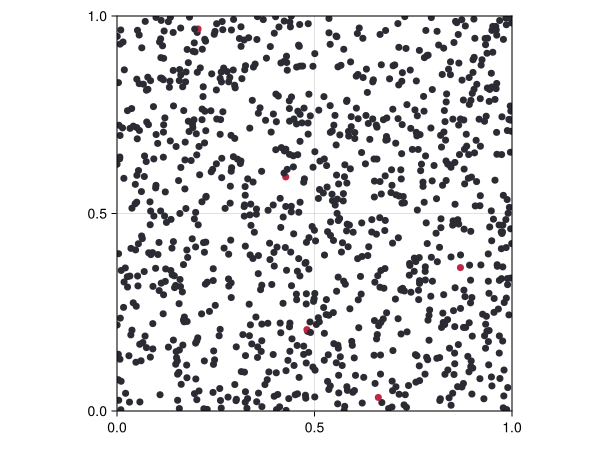

In [12]:
fig, ax, abmp = abmplot(sir_model; agent_color = sir_colors, agent_size = 10)
fig

Animation time

In [13]:
sir_model = sir_initiation()

abmvideo(
    "socialdist4.mp4",
    sir_model;
    title = "SIR model",
    frames = 80,
    agent_color = sir_colors,
    agent_size = 10,
    dt = 1,
    framerate = 20,
)

## Analyzing exponential spread

In [14]:
infected(x) = count(i == :I for i in x)
recovered(x) = count(i == :R for i in x)
adata = [(:status, infected), (:status, recovered)]

2-element Vector{Tuple{Symbol, Function}}:
 (:status, infected)
 (:status, recovered)

Try different parameters

In [15]:
r1, r2 = 0.02, 0.05
β1, β2 = 0.5, 0.1
sir_model1 = sir_initiation(reinfection_probability=r1, βmax=β1)
sir_model2 = sir_initiation(reinfection_probability=r2, βmax=β1)
sir_model3 = sir_initiation(reinfection_probability=r1, βmax=β2)

data1, _ = run!(sir_model1, 3000; adata)
data2, _ = run!(sir_model2, 3000; adata)
data3, _ = run!(sir_model3, 3000; adata)

data1[(end-10):end, :]

11×3 DataFrame
 Row │ time   infected_status  recovered_status 
     │ Int64  Int64            Int64            
─────┼──────────────────────────────────────────
   1 │  2990              650               243
   2 │  2991              652               241
   3 │  2992              651               242
   4 │  2993              651               242
   5 │  2994              651               242
   6 │  2995              651               242
   7 │  2996              650               243
   8 │  2997              651               242
   9 │  2998              649               244
  10 │  2999              650               243
  11 │  3000              647               246

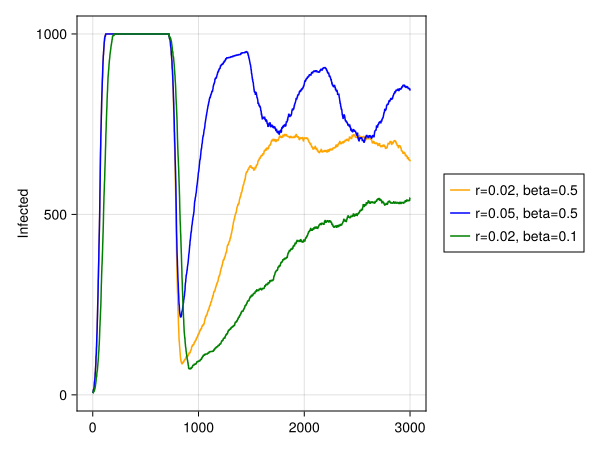

In [16]:
figure = Figure()
ax = figure[1, 1] = Axis(figure; ylabel = "Infected")
l1 = lines!(ax, data1[:, dataname((:status, infected))], color = :orange)
l2 = lines!(ax, data2[:, dataname((:status, infected))], color = :blue)
l3 = lines!(ax, data3[:, dataname((:status, infected))], color = :green)
figure[1, 2][1,1] = Legend(figure, [l1, l2, l3], ["r=$r1, beta=$β1", "r=$r2, beta=$β1", "r=$r1, beta=$β2"])
figure

## Social distancing
The simplest way to model social distancing is to make some agents not move. Here we make 80% of the agents not move.

In [17]:
sir_model = sir_initiation(isolated=0.80)

Agents.abmvideo(
    "socialdist5.mp4",
    sir_model;
    title="Social Distancing",
    frames=200,
    dt=2,
    agent_color=sir_colors,
    agent_size = 10,
    framerate=20,
)

display_mp4("socialdist5.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAQgTNtZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTMgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTUwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjAuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAw01liIQAP//+963fgU3AQO1rulc4tMurlDQ9UfaUpni2SAAAAwAAAwAAUmZfwZu/4hMHyO5m1nSjJkGqSH56+CLNUVxSSAYt592l+jmi4jVSGZ7aAJdE0kJTl2WFn5wiJrRVjshOqWOTT7WIgysVtXGnX8R56zISAxcK8rur6A7i3ak2nVqVyQNQGbSGUfK2uNuIVgro7mQJCdz7JD8qykXm83qZ8PCl+91IQdCbpYhg/0xmQw7N+Q3gbxBCDK9aT0fNg8ZH71D5cyBumFIrAqjxuG9xBbrfP3TE3CYaV3BIeO+c74qbGWl75EzegfDaq/tkU41oDpmATyspbQmaOvB7uLZu9IQyNH/8bs5IX/d0OJjyckiyN+4q5CM0iWLXAgnHl9KLSWpLl2yF6UysfQicgmMa+UkNkqkmjlsayh/p7dt5aATCqZHWEDc+sQmcj/0UY+fioknU7itJLPMvu+cnN+K2DOvR2hh+CUHdvmT5avWTU1+p322L0TI/To13Ru77et2G8ztvxibIk2xoScoAzLzaF8bxJ9XJTdNO+O5l8PisIP/8kuBe1DhWvfHNWlncXC90Divbp72b4ZtLk25aUBJHZgWOABqsboNjQKm9LQX0HMPudDMsoP55+xJsDRkz72sEgzzBxBnyX84Otff46xa2oDuldYF9FZRbbS42zNft7Ok7aNjUANnhNGrOV+4bl5Kj4HPm7byUWMgf8RyM49UKSK8lSJ8K9+4UtsImSH75/sXrLDefXNqcDDhaISLS29MvHdjnpPNUknGIkTzN2dK/EvpfADdw3I12wMxpo5V3OWRj6NexSnKpMYHSX9DDOd1NaUs+xBcbA3jbcmkwANGBPypggDOZgj+7vsfYAhTfxn1iYE6DwxHouhBD6DmHEBmcGJPl9L3t9YOw8iYpg2DaP/aaYHdPjHBiOGbtA5ygEwOJ5TiFanS3aSAaeQg4KcBTfXcZ/huneA4eCw3omrT1wE6zB6SlyqQi+8a358ulh4zx4kaIAIuJTa5Dkrb1OwpmgfkLicEc/A2FNZEUY9v7LjlFI5MMDSRnQ37SZgVkllx7HMsqE6N1jEmlpQMmK2xLTzzTFIGtD0V7QvP/UyjP0Rvf+YtBRXJjvo1mpGLDWUUYSiC0anWFnt/TVpid+l99Wtp9bm4JFPN/wP1AFTcxz91EDLoP8UdrHwn4HJvkm4h4uZGmA7DvtreBMSHnlrFQeUq/8UifoHhD9/cvWYCUE0q0+oMjytx9ByXpRP0/fbxcgY9GCEbrNzs40I9HKRtks58pdnELIsFi3H8n1jryI2BdNJZ9nXkpVGDOcVe6X5o+cVzld0BQppR8G/Iah+4wgGs4zYtkbKry4zqUTGAANRhoQsVz7lAK9eZ54KdwkqNSmTwnAWGT+f2+htci0285m7gtX911jHBpfk1/xiopAOiTN5nnVohCfrvuNJCEL0uAaMJglRoSz8J1aGgYUIkJfC8GCOvQ/Xj+2JyktesOsZeJK1Sq+S4nqyAVbUkc0c9U7V9nOBrrzsU8TjTtYOvBoeXdSViMkx+qYRIU/ps5iUAtjcwYEOfyvBjrpwwbMaHEPRt/5F8+FXSsOpl3odGshTzw3DAuKyi74+ythEZlmun8dY8dWFOO5KN9mVACJAwYsZaP3B1IaSeSBrQKuif2txoKsJTi+T/wU+48bpYyL23/dn5Bf7GHDY3mng571M59Qv9F2DThiL1k3E52RlIt5LAyybAB5Yie2NFww9gcX/JjVfiSg/2LW5LJBIGIG2Hhh8z9Iczfrg86qC5CPeZzSH/7DNtx7c7lkKxLvDv6PCsHVfuaURVl+p2cC9xLkMn9/q8YAuDEByT4xyIynwvfP6LYYqj+a5NiOqxAABRMd3PC/IP4jp629HyL3ZVUowRqA7GoCNB5Y1J55qmRG3k8o4R9FDOrF58prgRtZocT36xBKBc0QewS2opZvJmd91EEQ6kI8x7/VOOqSqih5wyr/TJnfhmd4i2+iNxzIjutxA/FMVDdp278bYUrXyi/kgaTS5ZSK3zvYjKqq7xQtXK6xT/WYbPlJgz/KJb6GSPU6JcV9D3Id0Rp53fFk7J9iWodDuNtoDXQ10qkTKJSf9pcxn+2x08vVMBIFVmomfmE/3UMDzFeaNIu9lQsAizmib/ts48zH2bAPDQNesvSZyL0NRZwV2jxVglANq0sK6hWu6uIxKLCnhe/flgkxjqcmgxdpkU0MCIlUpoZFPVwKyKRMp5bSX2vRmuF6JAC4J/adW8NBUAhNrmAJedtHs5Y/zy+iRx6SxvuJ/zt5COm5g0cbrFCzs3B1dDKW/YBZ98Xx+1RcUctTeeXKebPnl9gnTlqB/U9uUKeZDROB+dzoEBqXVwLt6zOQrowTzL9FdnnFYCquSW5NyKyYmTTwppK8VgT9JK22ALC4EOIfzXaGTDaqnbRTJes9pgoXhr+sSVi/eGOP9sPMwHKfHUdHRsXFSLmBZAJP3nDeZd3u1Tn/56t65I+SYrKeQTE2p2+X/3AmPRh9QpEiO3wIi2YWpuQORsPKnuu1q0AppEkdVItncSObLNbDpkpJ1Gq4E/vwrVJhiKJepal02Tx9asxQS686X/gLXB2evhbu/KCgebdUmjVxeMvW4qnQtthONGfr/fuOXuryAIDwI3F2OUkmfR/DGkC8TfKmyz96V1wn9aKQm2ogNwayBiqmgspZg+tgv8f6oz/glOWdfgpnbQT8dwiCsSZx3Z5SjO4G723zczTNvgpn+A51+u1LQGW/gaD5Ig28xSqZOCvQ4A/o5T38bSz++WOzpsB6hcL+BGbekCJbfIjc1QPbolhi3xQ6IAi4wuRYbUjgyrJrkcENwVL3ztrzf26FRdJLOguvycP30j5/////hj80v+igm+Ov+ewBRS9DdDg/LSNviHtvIjCTi0UqGs5k0FBYXsrdRmVKZBBOWWlv3jQON1yxQ93fTFfuBpRSpnA8xuuPOVC4SnaT2XS1BW

Compare the number of infected agents for different parameters.

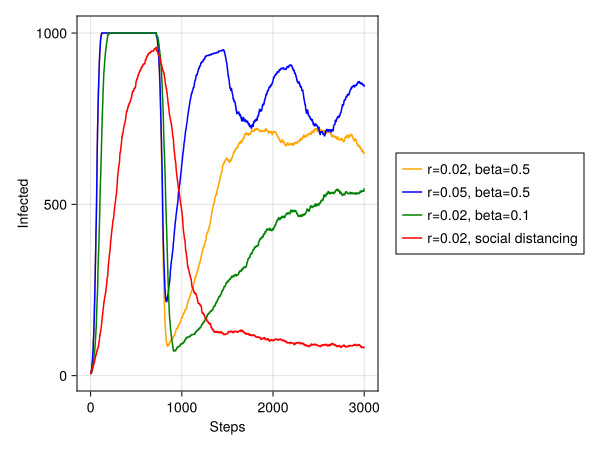

In [18]:
r4 = 0.02
sir_model4 = sir_initiation(reinfection_probability=r4, βmax=β1, isolated=0.80)

data4, _ = run!(sir_model4, 3000; adata)

figure = Figure()
ax = figure[1, 1] = Axis(figure; ylabel="Infected", xlabel="Steps")
l1 = lines!(ax, data1[:, dataname((:status, infected))], color=:orange)
l2 = lines!(ax, data2[:, dataname((:status, infected))], color=:blue)
l3 = lines!(ax, data3[:, dataname((:status, infected))], color=:green)
l4 = lines!(ax, data4[:, dataname((:status, infected))], color=:red)
figure[1, 2] = Legend(
    figure,
    [l1, l2, l3, l4],
    ["r=$r1, beta=$β1", "r=$r2, beta=$β1", "r=$r1, beta=$β2", "r=$r4, social distancing"],
)
figure

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*